<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Electromagnetics/SimPEG_plot_waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install SimPEG

     |████████████████████████████████| 256kB 4.7MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 593kB 46.2MB/s 
  Created wheel for SimPEG: filename=SimPEG-0.12.0-cp36-none-any.whl size=298568 sha256=d1f0eedaa9230774b7e09e0584090c0f8f82de3199afc0481d26a06ff62befe0
  Stored in directory: /root/.cache/pip/wheels/2e/5a/e9/91fe65f3693bf49496c16b290be247c1ce2a83cbc0ecd6de89
  Created wheel for pymatsolver: filename=pymatsolver-0.1.2-cp36-none-any.whl size=15910 sha256=d49ca44b253413c070146492f3e6cc033a232f3e298fe535d97242860044f015
  Stored in directory: /root/.cache/pip/wheels/09/66/a3/c540b8d29d1edab2bd4fabe368987aedc7fda18e742672be5b
  Created wheel for properties: filename=properties-0.6.1-cp36-none-any.whl size=58336 sha256=0ed03f7275870f55897c90835f78642b21058be26f441248e3a1ec65a3d531ce
  Stored in directory: /root/.cache/pip/wheels/9d/d9/66/f1f984e6dbe9ca4fb0c51617e526a73945f90936d4ae040fc2
  Created wheel for vectormath: filename=

In [0]:
%matplotlib inline


TDEM: Waveforms
===============

In this example, we plot the waveforms available in the TDEM module in addition
to the `StepOffWaveform`


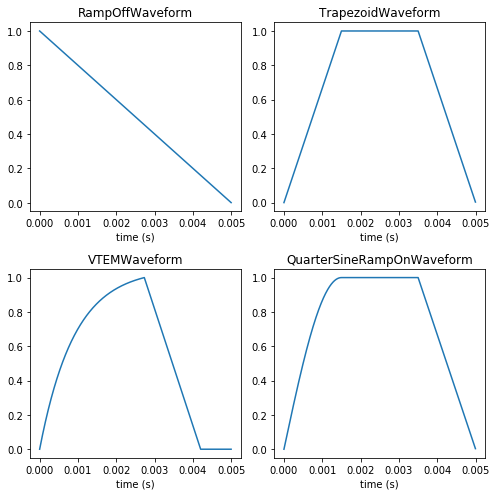

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from SimPEG.Utils import mkvc
from SimPEG.EM import TDEM

nT = 1000
max_t = 5e-3
times = max_t * np.arange(0, nT) / float(nT)

# create the waveforms
ramp_off = TDEM.Src.RampOffWaveform(offTime=max_t)
vtem = TDEM.Src.VTEMWaveform()
trapezoid = TDEM.Src.TrapezoidWaveform(
    ramp_on=np.r_[0., 1.5e-3],  ramp_off=max_t-np.r_[1.5e-3, 0]
)
quarter_sine = TDEM.Src.QuarterSineRampOnWaveform(
    ramp_on=np.r_[0., 1.5e-3],  ramp_off=max_t-np.r_[1.5e-3, 0]
)

waveforms = dict(zip(
    [
        'RampOffWaveform', 'VTEMWaveform', 'TrapezoidWaveform',
        'QuarterSineRampOnWaveform'
    ],
    [ramp_off, vtem, trapezoid, quarter_sine]
))

# plot the waveforms
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax = mkvc(ax)

for a, key in zip(ax, waveforms):
    wave = waveforms[key]
    wave_plt = [wave.eval(t) for t in times]
    a.plot(times, wave_plt)
    a.set_title(key)
    a.set_xlabel('time (s)')

plt.tight_layout()
plt.show()